<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/NB15_03__ML_UnsupervisedLearning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Não Supervisionados (Unsupervised Methods)

![SupervisedLearning](https://github.com/MathMachado/Python_RFB/blob/DS_Python/Material/Supervised_X_Unsupervised.jpeg?raw=true)

Source: [Supervised vs Unsupervised Learning](https://www.linkedin.com/posts/asif-bhat_machinelearningalgorithms-machinelearing-activity-6576071130854055936-2mIn/)

## Leitura Complementar
https://scikit-learn.org/stable/

# Introdução aos Algoritmos de Aprendizagem não-supervisionada
* Unsupervised Learning são um tipo de Machine Learning que trabalha com dataframes não-rotulados;
* Intuitivamente, os modelos desta classe tentam estabelecer relacionamento entre os dados;
* Algoritmo mais comum: clustering.

# Clustering
* Agrupa objetos similares.
* Aplicações de Clustering:
  - Rotular os dados;
  - Entender padrões escondindos nos dados;

## Exemplo

### Carrega as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carrega os dados

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_features = 2, n_samples = 1000, centers = 3, cluster_std = 1, random_state = 20111974)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X

array([[ 5.66868463,  2.60857758],
       [ 6.41530477,  2.06066118],
       [ 6.20602266,  2.49653283],
       ...,
       [ 1.26985212, -0.34504332],
       [ 0.71079332,  3.30008912],
       [ 2.50595087,  3.93242388]])

### Relação entre as variáveis

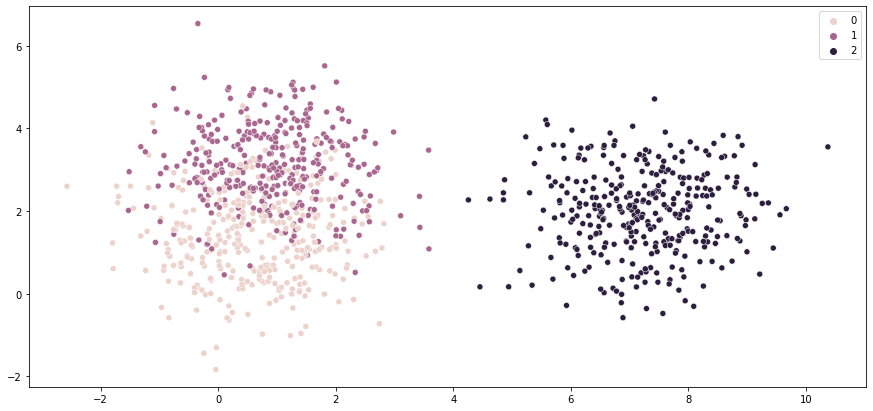

In [3]:
f, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, data = X)

### Distância ou Similaridade
* Dados do mesmo grupo/cluster são similares ao passo que dados pertencentes a diferentes grupos/clusters são diferentes; 
* Precisamos medir a similaridade e diferenças entre os dados; 
* Considere as seguintes medidas:

 - Distância de Minkowiski: 
 
 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4060cc840aeab9e41b5e47356088889e2e7a6f0f">
 
 - Distância de Manhattan (p=1), Euclidiana (p=2)
 
 - Cosseno: Adequado para dados de texto

 <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d"> 

In [4]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances
from scipy.spatial.distance import cdist

## Tipos de Clustering
* Métodos de particionamento:
  - Particionar N pontos em k partições.
  - Inicialmente, partições aleatórias são criadas e gradualmente os dados são movidos para outras partições;
  - Usa-se as distâncias entre os pontos para otimizar os clusters;
  - Exemplo: KMeans
* Métodos Hierárquicos
  - Decomposição do dataframe;
  - Approach 1: assume cada dado individual como cluster e na sequência os dados vão sendo agrupados conforme a similaridade;
  - Approach 2: Começa com 1 cluster para todos os dados e, na sequência, particiona-se em clusters menores;
* Métodos Density-based
  - Vai acrescentando dados ao cluster até que a densidade exceda um certo threashold.

## Métodos de Particionamento
### KMeans
> K-means é um algoritmo simples de Machine Learning que agrupa um conjunto de dados ou pontos em k clusters especificado pelo usuário.
>> O algoritmo é um tanto ingênuo, pois agrupa os dados em k clusters, mesmo que k não seja o número certo de agrupamentos a serem usados. Portanto, ao usar k-means, os usuários precisam de alguma maneira de determinar se estão usando o número certo de clusters.
>>> Formas de se determinar o número ideal de clusters:
* **Método de Elbow** - um dos métodos mais populares para determinar o valor ótimo de k;
* **Silhoute Score**;
* **Calinski Harabaz Score**;
* **Dendograma**.

#### Como funciona o k-Means
Animação para entendermos K-Means: http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

#### Elbow Method
* O método de Elbow calcula:
    * **Distorção**: é a média das distâncias dos centros dos respectivos clusters. Normalmente, a métrica de distância euclidiana é usada.
    * **Inércia**: É a soma das distâncias quadradas das amostras ao centro de aglomerado mais próximo.
* Para determinar o número ideal de clusters, selecione o valor de k no gráfico de Elbow a partir do qual a distorção/inércia começa a diminuir de maneira linear.

### Algoritmo K-Means
1. Inicializa k centroides de forma aleatória;
2. Atribui cada dado/ponto ao centroide mais próximo, criando clusters;
3. Recalcula centroide, que é a média de todos os dados/pontos que pertencem a cada cluster;
4. Repete os passos 2 e 3 até que não se tenha dados/pontos para atribuir aos centroides;

* Os centróides são escolhidos de forma a minimizar a soma dos quadrados do cluster.

In [5]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

In [6]:
# Função adaptada de: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
def Numero_Clusters_Elbow(X):
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,10)    
    for k in K:
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k).fit(X) 
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeanModel.inertia_)
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 

    # Using the different values of Distortion
    print('Cálculo da Distorção:')
    for key,val in mapping1.items():
        print(str(key)+' : '+str(val))

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show() 

    # Using the different values of Inertia
    print('Cálculo da Inertia:')
    for key,val in mapping2.items():
        print(str(key)+' : '+str(val))

    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia')
    plt.show() 

### Exemplo 1

In [7]:
X_ex1, y_ex1 = make_blobs(n_features = 2 , n_samples = 1000, cluster_std = .5, random_state = 20111974)
X_ex1

array([[ 6.32233172, -8.15367151],
       [ 2.38262958, -2.88488411],
       [ 4.577605  ,  0.25531867],
       ...,
       [ 3.06235525, -2.36860093],
       [ 5.7750324 ,  0.82187585],
       [ 7.10580242, -8.19206922]])

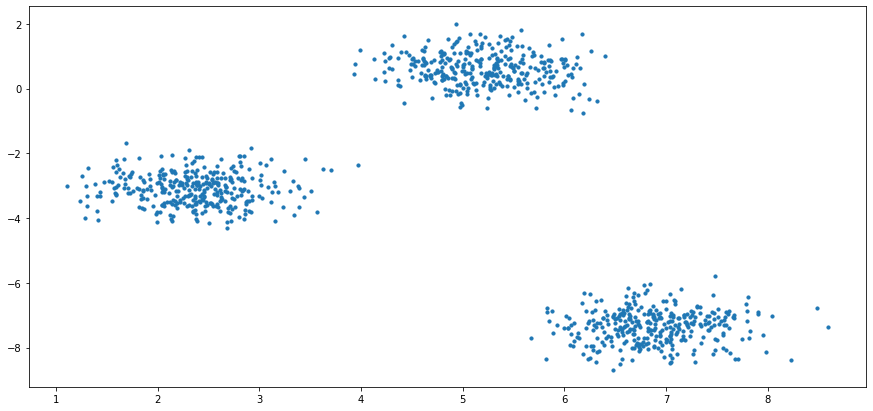

In [8]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex1[:, 0], X_ex1[:, 1], s = 10)

Quantos clusters tem a figura acima?

Cálculo da Distorção:
1 : 3.67739361689911
2 : 1.8032696991705193
3 : 0.6265294149511712
4 : 0.5806399390439929
5 : 0.5363586047726522
6 : 0.49321043235440976
7 : 0.4654119284275973
8 : 0.4347395148395455
9 : 0.4075172651769019


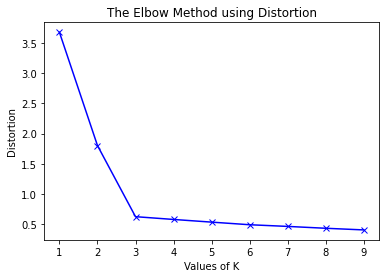

Cálculo da Inertia:
1 : 14520.338689461656
2 : 4121.889915609924
3 : 494.80547497707784
4 : 433.1714121067288
5 : 374.15944221026564
6 : 319.56231227085146
7 : 283.1735919414216
8 : 247.88114755693988
9 : 214.77283175415795


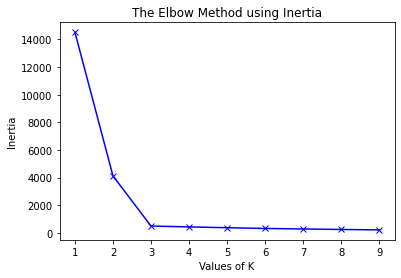

In [9]:
Numero_Clusters_Elbow(X_ex1)

Os gráficos de Elbon/Inércia apontam que o número ideal de clusters são 3.

In [10]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_ex1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

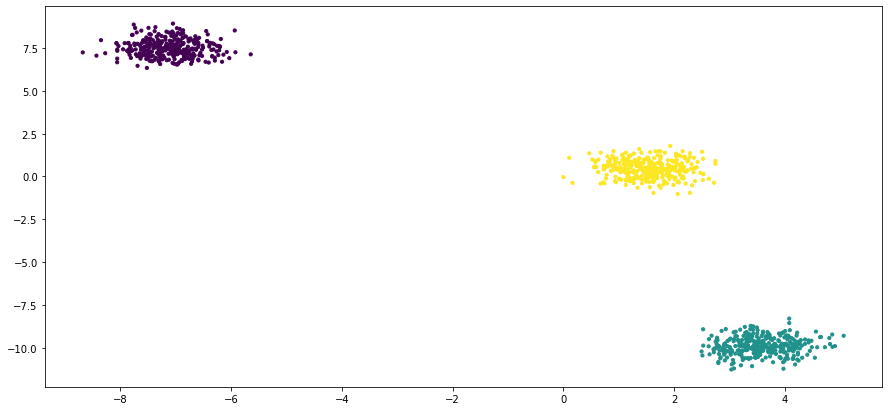

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex1[:, 0], X_ex1[:, 1], s = 10, c = kmeans.predict(X_ex1))

### Dendograma

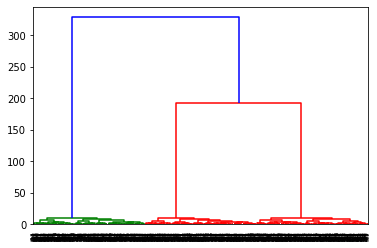

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex1))
plt.show()

### Exemplo 2

In [ ]:
X_ex2, y_ex2 = make_moons(n_samples = 1000, noise = .09, random_state = 20111974)
X_ex2

array([[ 0.1972703 ,  0.29190608],
       [-0.36459207,  0.95537818],
       [-0.40703338,  0.85578596],
       ...,
       [-0.14766762,  0.93944895],
       [-0.2949373 ,  0.98190165],
       [ 0.05829758, -0.21351566]])

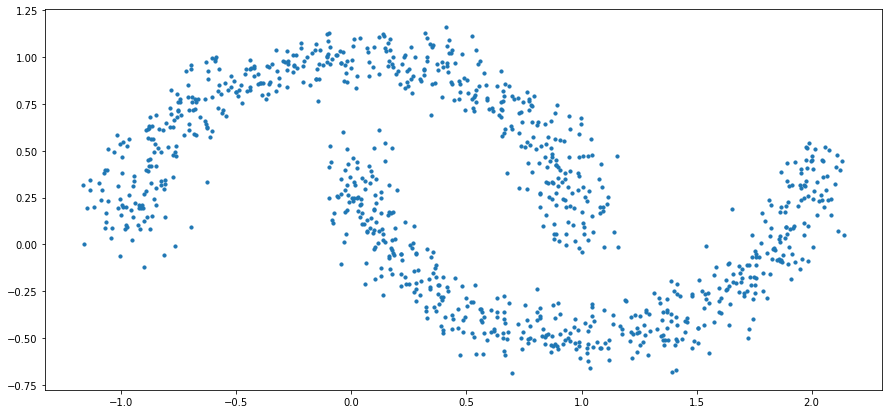

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex2[:, 0], X_ex2[:, 1],s = 10)

Cálculo da Distorção:
1 : 0.9243261375635499
2 : 0.6026257663712102
3 : 0.48780057921514214
4 : 0.39559517563892127
5 : 0.3333270740748776
6 : 0.2780667402291196
7 : 0.24700441052842273
8 : 0.21778499956089006
9 : 0.20027508992403323


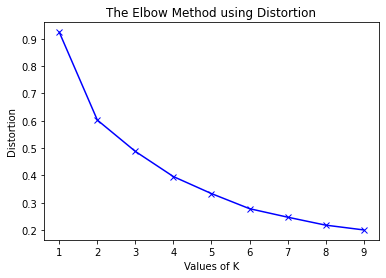

Cálculo da Inertia:
1 : 1002.6555055064175
2 : 403.81732634870207
3 : 273.2430583955537
4 : 181.98244495843645
5 : 137.55798922260794
6 : 95.14232365024492
7 : 76.61528073712861
8 : 57.93232655216818
9 : 49.02358485046309


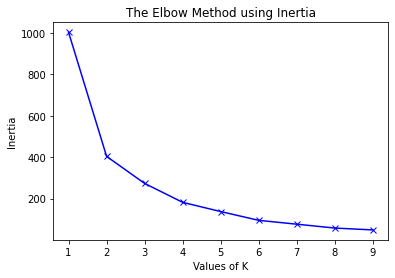

In [ ]:
# Quantos clusters tem os dados acima
Numero_Clusters_Elbow(X_ex2)

Número ideal de clusters são 2.

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_ex2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

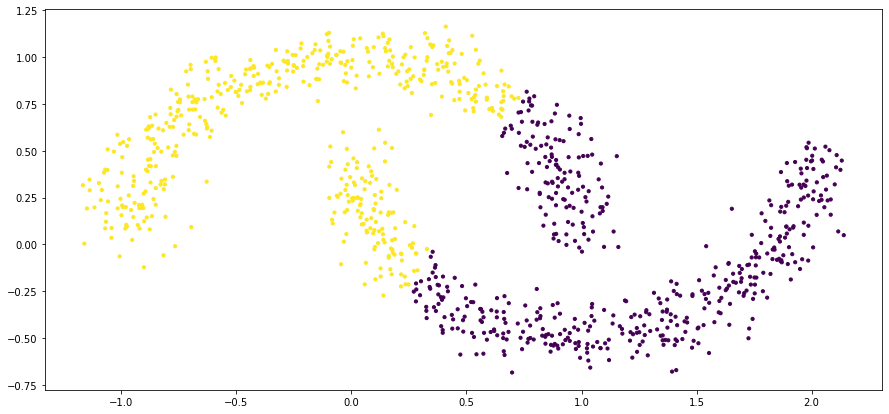

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex2[:, 0], X_ex2[:, 1], s = 10, c = kmeans.predict(X_ex2))

### Dendograma

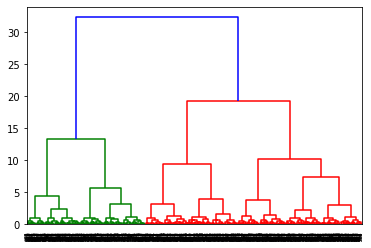

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex2))
plt.show()

### Limitações do K-Means
* Chance/possibilidade de um dado/ponto pertencer à múltiplos clusters;
* K-Means tenta encontrar os mínimos locais e isso depende dos valores iniciais que são gerados aleatoriamente.

### Hierarchial Clustering
* Combina múltiplos clusters similares para criar um cluster ou OU particionar um cluster para criar clusters menores de forma a agrupar dados/pontos similares;
* Tipos de hierarchaial Clustering:
  - Agglomerative Method - botton-up approach.
  - Divisive Method - top-down approach.

#### Agglomerative Method
* Inicia atribuindo um cluster para cada dado/ponto; 
* Combina clusters que possuem alta medida de similaridade;
* As diferenças entre os métodos surgem devido a diferentes maneiras de definir a distância (ou similaridade) entre os clusters. As seções a seguir descrevem várias técnicas aglomerativas em detalhes.
  - Single Linkage Clustering
  - Complete linkage clustering
  - Average linkage clustering
  - Average group linkage

### Exemplo 3

In [ ]:
X_ex3, y_ex3 = make_moons(n_samples = 1000, noise = .05, random_state = 20111974)
X_ex3

array([[ 0.06607263,  0.29979848],
       [ 2.06894833,  0.32965744],
       [ 0.15070025, -0.01900197],
       ...,
       [-0.65601144,  0.83364106],
       [-0.00757507,  0.40243752],
       [ 0.77528233,  0.53456138]])

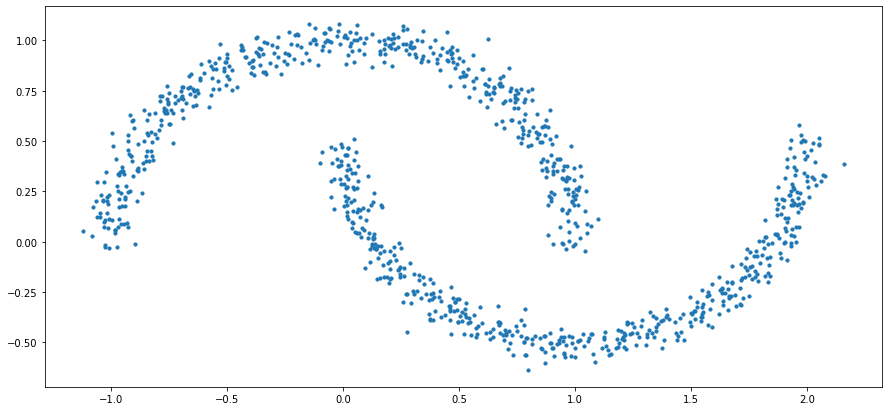

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex3[:, 0], X_ex3[:, 1], s = 10)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage = 'single', n_clusters = 2)
agc.fit(X_ex3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

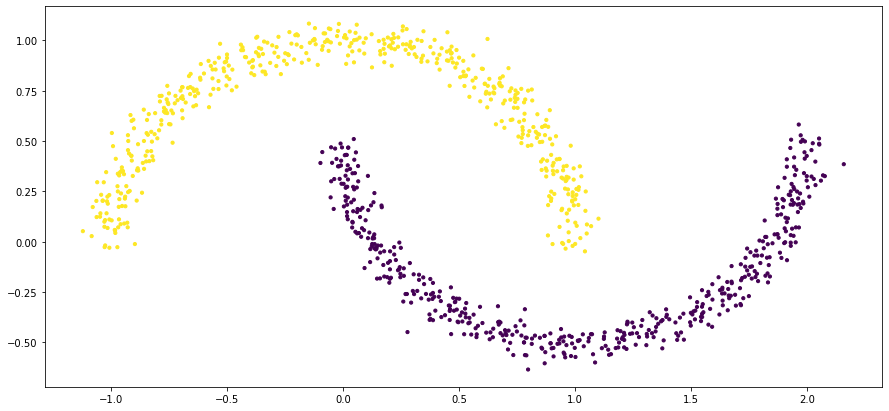

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex3[:, 0], X_ex3[:, 1], s = 10, c = agc.labels_)

### Dendograma

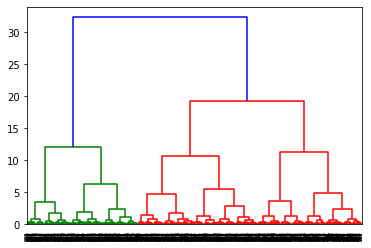

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X_ex3))
plt.show()

## Density Based Clustering - DBSCAN

### Exemplo 4

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X_ex4, labels_true = make_blobs(n_samples=750, centers = centers, cluster_std = 0.4, random_state = 20111974)

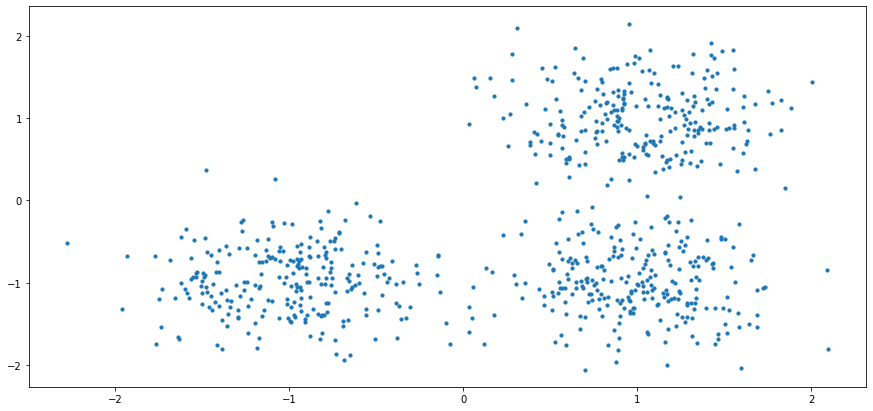

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex4[:, 0], X_ex4[:, 1], s = 10)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler
X_ex4 = StandardScaler().fit_transform(X_ex4)

db = DBSCAN(eps = 0.3, min_samples = 10).fit(X_ex4)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

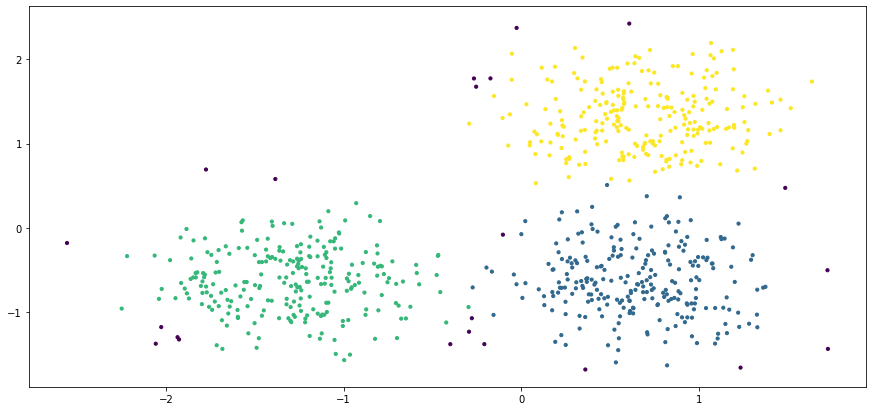

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex4[:,0], X_ex4[:,1], s = 10, c = labels)

# Medir a Performance dos Clusters

## completeness_score
- 'Completeness' significa que todos os pontos/dados que são membros de uma determinada classe são elementos do mesmo cluster.
- Accuracy é 1.0 se o dado/ponto pertencente à mesma classe também pertence ao mesmo cluster, mesmo que múltiplas classes pertençam ao mesmo cluster.

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score(labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* Acurácia= 1 porque todos os dados/pontos pertencentes à mesma classe também pertence ao mesmo cluster.

In [ ]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

Porque a Acurácia = 0.3?

In [ ]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


Porque a Acurácia= 1?

## Homogeneity_score
- Uma clusterização satisfaz a homogeneidade se todos os seus clusters contiverem apenas pontos/dados que são membros de uma única classe.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [ ]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [ ]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Mesma classe subdividida em 2 clusters.

## silhoutte_score
* Calculado usando a distância intra-cluster média (a) e a distância média do cluster mais próximo (b) para cada amostra.
* **Decisão**: Quanto Maior --> Melhor.

### Exemplo 5
* Selecionar o número de clusters usando silhoutte_score no KMeans

In [ ]:
from sklearn.datasets import make_blobs
X_ex5, y_ex5 = make_blobs(n_samples = 500, 
                          n_features = 2,
                          centers = 4,
                          cluster_std = 1,
                          center_box = (-10.0, 10.0),
                          shuffle = True,
                          random_state = 20111974)

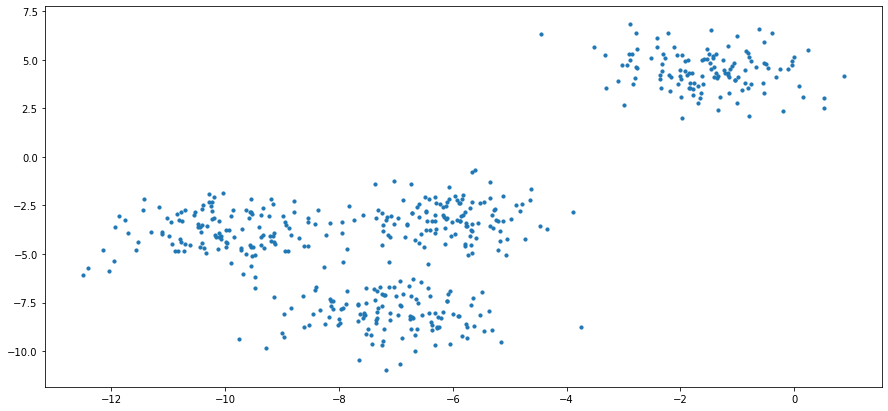

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex5[:, 0], X_ex5[:, 1], s = 10)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X_ex5)
    labels = kmeans.predict(X_ex5)
    print (n_cluster, silhouette_score(X_ex5, labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5741377071198657
6 0.45475680248615735


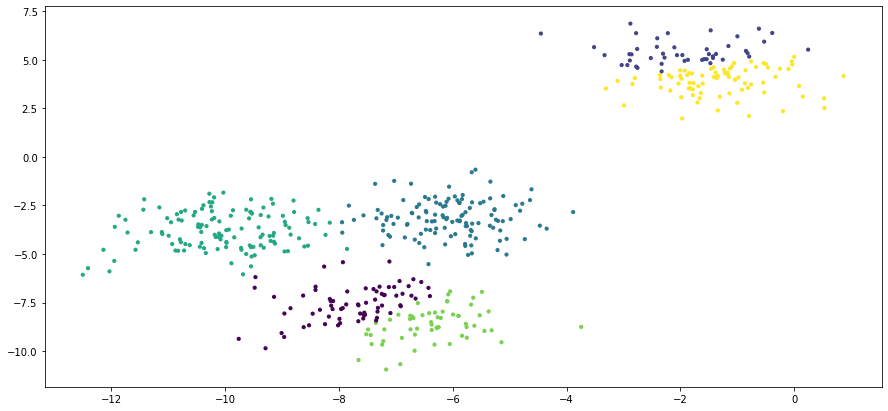

In [ ]:
f, ax = plt.subplots(figsize = (15, 7))
plt.scatter(X_ex5[:, 0], X_ex5[:, 1], s = 10, c = labels)

* O número ótimo/recomendado de cluster é 2. Porque?

## calinski_harabaz_score
* Este score é calculado como razão entre a dispersão dentro do cluster e a dispersão entre cluster.
* **Decisão**: Quanto menor --> Melhor.

In [ ]:
from sklearn.metrics import calinski_harabaz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters= n_cluster)
    kmeans.fit(X_ex5)
    labels = kmeans.predict(X_ex5)
    print (n_cluster, calinski_harabaz_score(X_ex5, labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2281.9620550479212
6 2043.442916084179


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Cálculo da Distorção:
1 : 4.8730426732681
2 : 2.470763279082185
3 : 1.7219833131005615
4 : 1.1928351581260648
5 : 1.1184186094578519
6 : 1.0513885489532426
7 : 1.0014265332464818
8 : 0.9405589934167263
9 : 0.9062153808655352


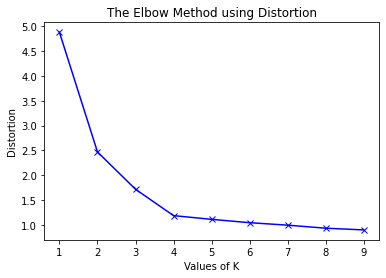

Cálculo da Inertia:
1 : 15767.554546172281
2 : 3735.4056749295637
3 : 1903.4503741659223
4 : 908.3855684760613
5 : 811.0170422004205
6 : 729.8352665166219
7 : 647.0625236059439
8 : 576.3090907969872
9 : 533.1360427379334


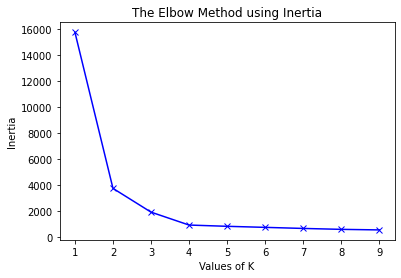

In [ ]:
Numero_Clusters_Elbow(X_ex5)

# Exercícios

## Exercício 1 - Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_Cancer, y_Cancer = load_breast_cancer()

SyntaxError: ignored

## Exercício 2 - Fruits

In [ ]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/FruitsDataWithColor.txt?token=AGDJQ66OKOVQC63ZVXGHMJ25P3M6G'
df_Fruits = pd.read_table(url)

l_feature_names_fruits = ['height', 'width', 'mass', 'color_score']
df_X_Fruits = df_Fruits[l_feature_names_fruits]
df_y_Fruits = df_Fruits['fruit_label']
l_target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

## Exercícios 3
* Use a base de dados DIAGNOSTICOS.xlsm e k-Means para definir grupos usando os atributos do dataframe, exceto o atributo 'DIAGNOSTICO'.
    * Quantos clusters k-Means define?
    * Agora, usando o atributo 'DIAGNOSTICO', com 5 níveis (veja a aba LEGENDA da planilha), verifique se, por exemplo, as categorias -10 foram agrupadas no mesmo cluster; 